In [1]:
import configargparse
import numpy as np
from cryoem.projections import *
import numpy as np
import os, sys
import scipy.io as sio
sys.path.append(os.getcwd())
import mrcfile
import astra
import pathlib
import h5py
from cryoem.rotation_matrices import RotationMatrix
from tensorflow_graphics.geometry.transformation import quaternion
from cryoem.conversions import quaternion2euler
import pickle
import os
import h5py
import numpy as np   

import sys
from cryoem.projections import RotationMatrix
from cryoem.conversions import euler2quaternion
from cryoem.plots import plot_detector_pixels_with_protein, plot_images, plot_rays, plot_angles_histogram, plot_quaternions_histogram, plot_rotvec, plot_polar_plot, plot_projection, plot_projections

In [2]:
import nglview as nv
PROTEIN = "5j0n"
print(f"{PROTEIN}.mrc")
view_density_map = nv.show_file(f"{PROTEIN}.mrc")
view_density_map

5j0n.mrc


NGLWidget()

In [3]:
file_name = './data/5j0n.mrc'

In [4]:
with mrcfile.open(file_name) as mrcVol:
    Vol      = np.array(mrcVol.data) 
    ProjSize = int(np.sqrt(np.sum(np.square(Vol.shape))))
print(Vol.shape)

(69, 57, 75)


In [5]:
#Then load the angle data:
file_angle = 'notebooks/0-data-preparation/angle_data.pkl'
with open(file_angle, 'rb') as f:
    angles2 = pickle.load(f)
print(angles2[:4])

[[0.        0.        0.       ]
 [1.8860662 2.0739784 3.6501303]
 [3.948796  1.4204998 2.6239626]
 [1.0760686 0.9697671 3.369385 ]]


In [6]:
#Here we resive the volumn to be 1/6
from scipy.ndimage import zoom
Vol = zoom(Vol, (0.2, 0.2, 0.2))
print(Vol.shape)
ProjSize = int(np.sqrt(np.sum(np.square(Vol.shape))))

(14, 11, 15)


In [15]:
print(Vol.shape)
import scipy
print(scipy.__version__)
Projections = generate_projections_ASTRA(Vol, angles2, ProjSize, BatchSizeAstra = "None")
dtype = np.float32
Projections = np.array(Projections, dtype=dtype)

(14, 11, 15)
1.4.1


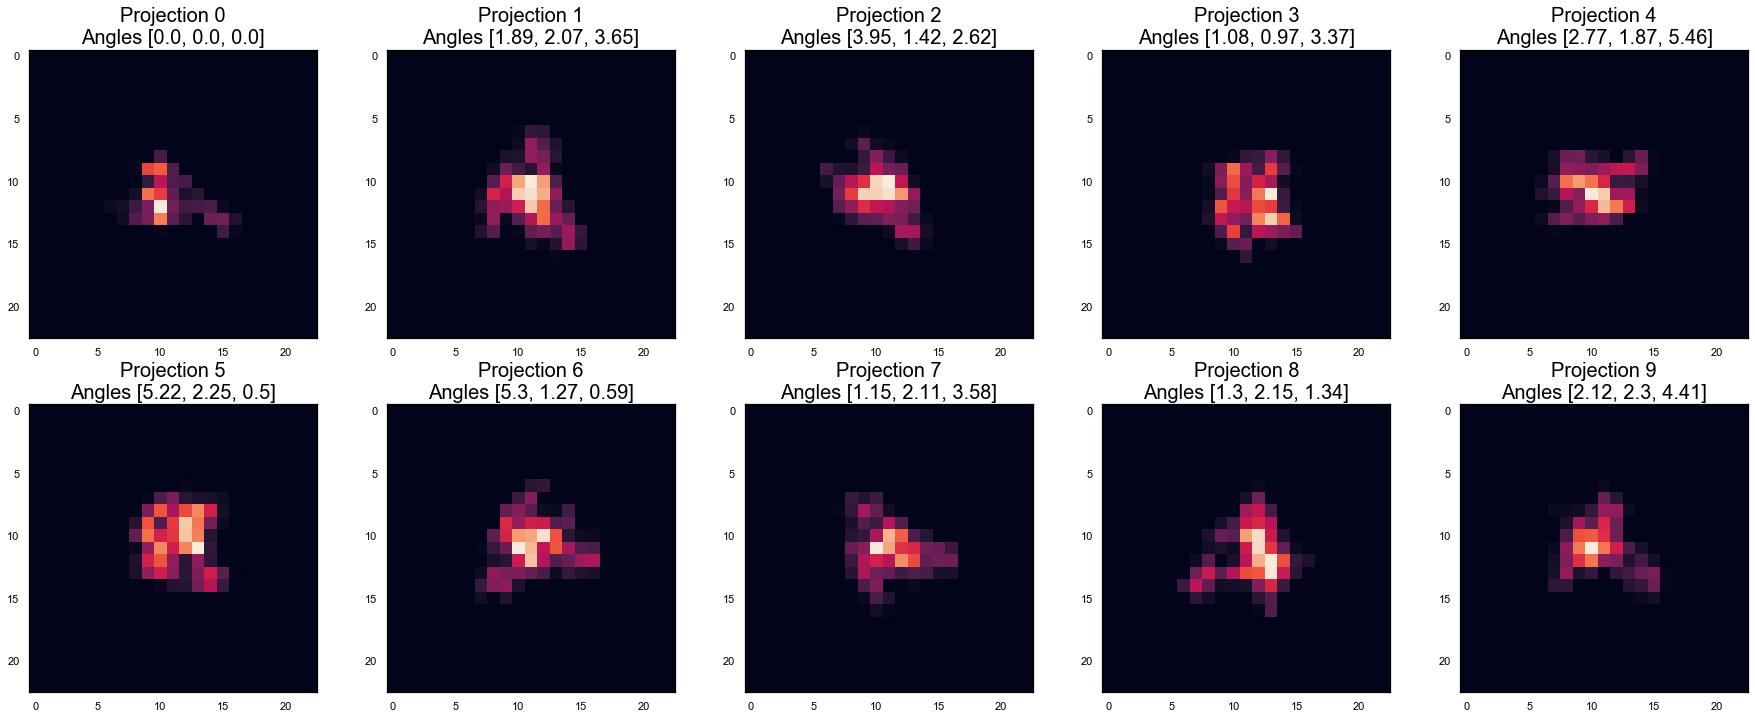

In [13]:
pids = range(10)
plot_projections(Projections[pids], [f'Projection {pid}\nAngles {list(map(lambda x: round(x,2) , angles2[pid]))}' for pid in pids], nrows=2, ncols=5)

(5000, 23, 23)


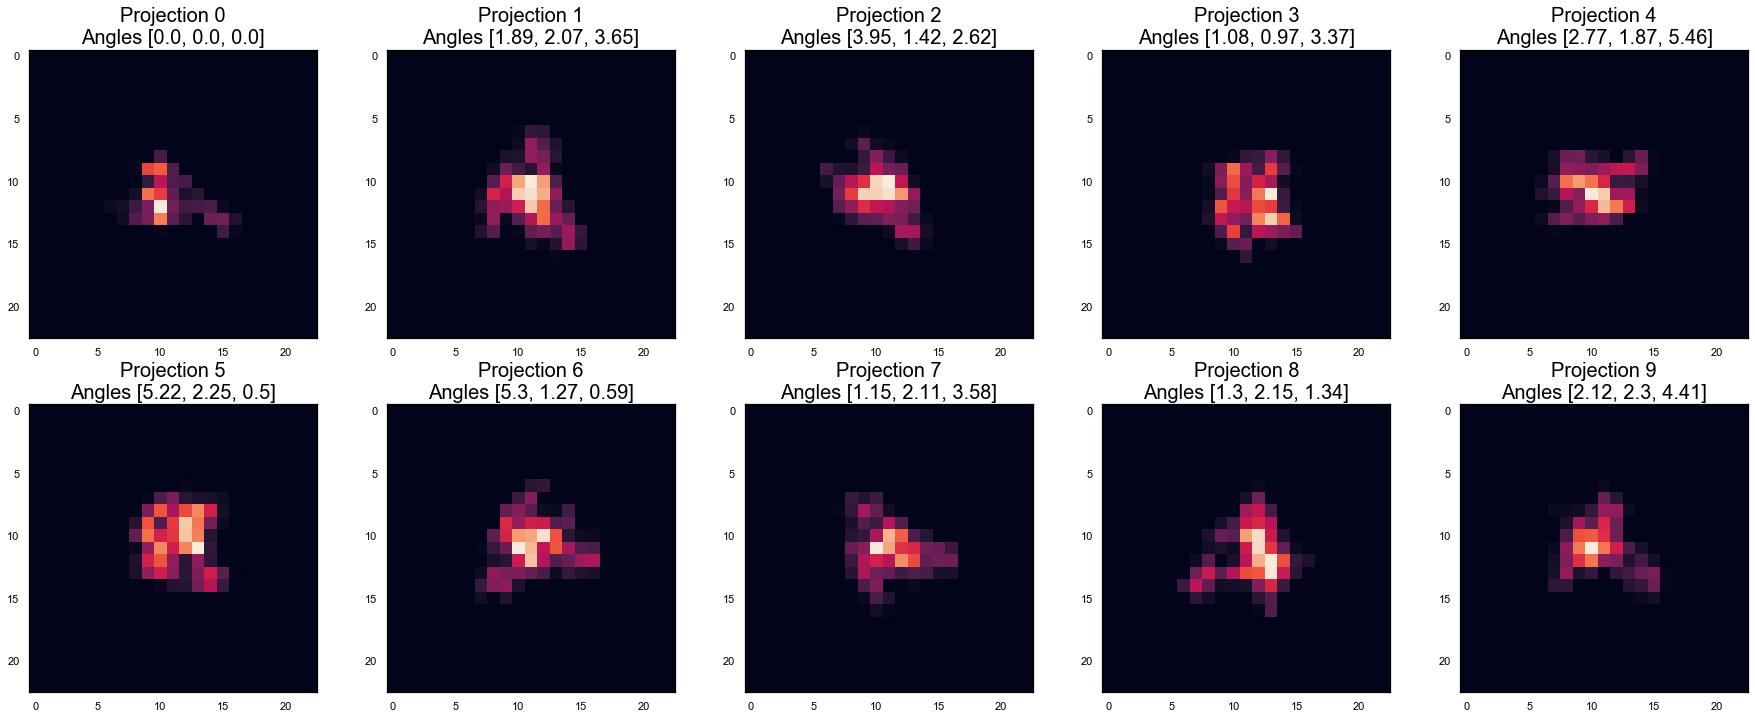

In [11]:
print(Projections.shape)
Projections = Projections.reshape(5000, -1, order = 'F')
Projections = Projections.reshape(5000, 23, 23, order = 'F')
pids = range(10)
plot_projections(Projections[pids], [f'Projection {pid}\nAngles {list(map(lambda x: round(x,2) , angles2[pid]))}' for pid in pids], nrows=2, ncols=5)